Universidad del valle de Guatemala
Andres Quinto
Andree Toledo
Laboratorio 4 DS / Mineria de textos

In [149]:
import imp
import pandas as pd
import re
import nltk
import io 
import wordcloud as wc
import random
import warnings
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.util import ngrams
from nltk import word_tokenize
from collections import Counter, defaultdict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aeqv2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Colocamos los valores en lowercase para que no haya problemas con las mayusculas
df = pd.read_csv('train.csv')

df['text'].str.lower()
df['location'].str.lower()
df['keyword'].str.lower()
#print(df.head())

print(df)

In [ ]:
#Eliminacion de caracteres especiales y signos de puntuacion
df.text = df.text.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.location = df.location.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
df.keyword = df.keyword.str.replace('[#,@,&,(,),!,?,/,{,},%,!]', '')
#Eliminacion de url
df.text = [re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in df.text]
df.text = [re.sub(r'^https?:\/\/.*[\r\n]*', '', i) for i in df.text]
#Eliminacion de emoticonos
df.text = [re.sub('[^a-zA-Z0-9 ]+','', i) for i in df.text]


In [ ]:
print(df)

In [ ]:
#Eliminacion de conjunciones (stopwords)
import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from cgitb import text

#https://towardsdatascience.com/how-to-clean-text-data-639375414a2f 

stopwords = set(stopwords.words('english') + ['the', 'i', 'a', 'deeds', 'im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'I', 'The', 'A', 'Amp', 'amp'])
expresiones = ['im','rt','jk','btw','lol','yolo','lmao','lmfao','fb','like','get','em', 'Im', 'in', 'In', '2']
for i in expresiones:
    stopwords.add(i)

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
# Creation of the colum named 'text without stopwords'
df['text_without_stopwords'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
# print(df.text)
clean_tweets = df['text_without_stopwords']
print(df['text_without_stopwords'])


#Obtencion de la frecuencia de las palabras tantoa de los tweets de desastres como de los que no.

In [ ]:
frec_dic_tweets = {}
for word in clean_tweets:
    if word in frec_dic_tweets:
        frec_dic_tweets[word] += 1
    else:
        frec_dic_tweets[word] = 1

tweets_frecuency = pd.DataFrame.from_dict(frec_dic_tweets, orient='index')
tweets_frecuency


Que palabra se repite mas?

In [139]:
#Creacion de una lista de palabras para cada tweet
word_count = Counter()

for title in clean_tweets:
    word_count.update(word.strip('.,?!"\'').lower() for word in title.split())
#A continuacion se crea una lista con los 10 tweets mas frecuentes
word_count.most_common(10)

[('fire', 250),
 ('new', 226),
 ('via', 220),
 ('dont', 206),
 ('people', 196),
 ('one', 191),
 ('news', 187),
 ('video', 164),
 ('us', 162),
 ('emergency', 156)]

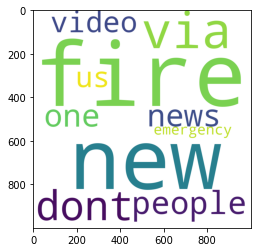

In [140]:
cloud_tweet = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_count)
plt.imshow(cloud_tweet)

#Grafico de barras para las palabras mas repetidas

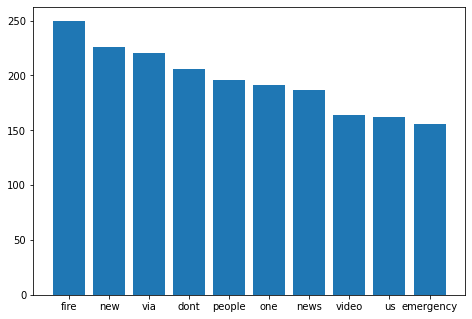

In [142]:
datos_tweet = word_count.most_common(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = [i[0] for i in datos_tweet]
y_axis = [i[1] for i in datos_tweet]
ax.bar(x_axis,y_axis)
plt.show()

N-Grama

In [147]:
val=round(len(datos_tweet)*0.1,0)
random_sample=random.sample(datos_tweet,int(val))

In [148]:
warnings.filterwarnings('ignore')

NameError: name 'warnings' is not defined

In [ ]:
digrama=[]
print(digrama)
size=2
def ngram(ngrama, size):
  for word in range(len(random_sample)):
    try:
      for item in ngrams(random_sample[word].split(),size):
          ngrama.append(item)
    except:
        return

ngram(digrama, size)
print(digrama)

[]
[('king', 'hopes'), ('hopes', 'real'), ('real', 'life'), ('life', 'finds'), ('finds', 'crossover'), ('crossover', 'audience'), ('audience', 'also'), ('also', 'hopes'), ('hopes', 'transplant'), ('transplant', 'real'), ('real', 'life'), ('life', 'st'), ('st', 'louis'), ('louis', 'cities'), ('cities', 'hes'), ('hes', 'moving'), ('moving', 'los'), ('los', 'angeles'), ('angeles', 'next'), ('next', 'month'), ('month', 'shop'), ('shop', 'show'), ('preparing', 'action'), ('action', 'weiner'), ('weiner', 'said'), ('plans', 'eve'), ('eve', 'care'), ('care', 'join'), ('join', 'group'), ('group', 'drinksdinner'), ('kidding', 'would'), ('would', 'host'), ('host', 'radio'), ('radio', 'show'), ('show', 'ive'), ('ive', 'planning'), ('passion', 'art'), ('art', 'plain'), ('plain', 'see'), ('see', 'way'), ('way', 'describes'), ('describes', 'time'), ('time', 'put'), ('put', 'one'), ('one', 'pieces'), ('pieces', 'wearing'), ('wearing', 'unique'), ('unique', 'piece'), ('piece', 'art'), ('art', 'came'), 

In [ ]:
trigrama=[]
print(trigrama)
size=3
ngram(trigrama, size)
print(trigrama)

[]
[('king', 'hopes', 'real'), ('hopes', 'real', 'life'), ('real', 'life', 'finds'), ('life', 'finds', 'crossover'), ('finds', 'crossover', 'audience'), ('crossover', 'audience', 'also'), ('audience', 'also', 'hopes'), ('also', 'hopes', 'transplant'), ('hopes', 'transplant', 'real'), ('transplant', 'real', 'life'), ('real', 'life', 'st'), ('life', 'st', 'louis'), ('st', 'louis', 'cities'), ('louis', 'cities', 'hes'), ('cities', 'hes', 'moving'), ('hes', 'moving', 'los'), ('moving', 'los', 'angeles'), ('los', 'angeles', 'next'), ('angeles', 'next', 'month'), ('next', 'month', 'shop'), ('month', 'shop', 'show'), ('preparing', 'action', 'weiner'), ('action', 'weiner', 'said'), ('plans', 'eve', 'care'), ('eve', 'care', 'join'), ('care', 'join', 'group'), ('join', 'group', 'drinksdinner'), ('kidding', 'would', 'host'), ('would', 'host', 'radio'), ('host', 'radio', 'show'), ('radio', 'show', 'ive'), ('show', 'ive', 'planning'), ('passion', 'art', 'plain'), ('art', 'plain', 'see'), ('plain', 

In [ ]:
tetragrama=[]
print(tetragrama)
size=4
ngram(tetragrama, size)
print(tetragrama)

[]
[('king', 'hopes', 'real', 'life'), ('hopes', 'real', 'life', 'finds'), ('real', 'life', 'finds', 'crossover'), ('life', 'finds', 'crossover', 'audience'), ('finds', 'crossover', 'audience', 'also'), ('crossover', 'audience', 'also', 'hopes'), ('audience', 'also', 'hopes', 'transplant'), ('also', 'hopes', 'transplant', 'real'), ('hopes', 'transplant', 'real', 'life'), ('transplant', 'real', 'life', 'st'), ('real', 'life', 'st', 'louis'), ('life', 'st', 'louis', 'cities'), ('st', 'louis', 'cities', 'hes'), ('louis', 'cities', 'hes', 'moving'), ('cities', 'hes', 'moving', 'los'), ('hes', 'moving', 'los', 'angeles'), ('moving', 'los', 'angeles', 'next'), ('los', 'angeles', 'next', 'month'), ('angeles', 'next', 'month', 'shop'), ('next', 'month', 'shop', 'show'), ('preparing', 'action', 'weiner', 'said'), ('plans', 'eve', 'care', 'join'), ('eve', 'care', 'join', 'group'), ('care', 'join', 'group', 'drinksdinner'), ('kidding', 'would', 'host', 'radio'), ('would', 'host', 'radio', 'show')

In [ ]:
pentgrama=[]
print(pentgrama)
size=5
ngram(pentgrama, size)
print(pentgrama)

[]
[('king', 'hopes', 'real', 'life', 'finds'), ('hopes', 'real', 'life', 'finds', 'crossover'), ('real', 'life', 'finds', 'crossover', 'audience'), ('life', 'finds', 'crossover', 'audience', 'also'), ('finds', 'crossover', 'audience', 'also', 'hopes'), ('crossover', 'audience', 'also', 'hopes', 'transplant'), ('audience', 'also', 'hopes', 'transplant', 'real'), ('also', 'hopes', 'transplant', 'real', 'life'), ('hopes', 'transplant', 'real', 'life', 'st'), ('transplant', 'real', 'life', 'st', 'louis'), ('real', 'life', 'st', 'louis', 'cities'), ('life', 'st', 'louis', 'cities', 'hes'), ('st', 'louis', 'cities', 'hes', 'moving'), ('louis', 'cities', 'hes', 'moving', 'los'), ('cities', 'hes', 'moving', 'los', 'angeles'), ('hes', 'moving', 'los', 'angeles', 'next'), ('moving', 'los', 'angeles', 'next', 'month'), ('los', 'angeles', 'next', 'month', 'shop'), ('angeles', 'next', 'month', 'shop', 'show'), ('plans', 'eve', 'care', 'join', 'group'), ('eve', 'care', 'join', 'group', 'drinksdinne